# Segmentation Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import cv2
import os
%matplotlib inline

In [211]:
nii6img = nib.load('./two_cells.nii')
nii6img = np.asarray(nii6img.get_fdata())
nii6img.shape
# plt.imshow(nii_img.get_fdata()[:,:,0], cmap='gray')

(512, 512, 28)

In [210]:
filename, file_extension = os.path.splitext('./two_cells.nii')
if file_extension == '.nii': print("yes")

yes


(-0.5, 511.5, 511.5, -0.5)

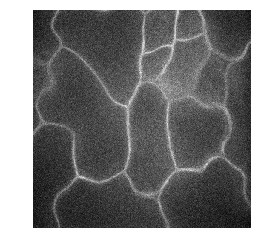

In [9]:
img = plt.imread('./T01.tif')
plt.imshow(img,cmap='gray')
plt.axis('off')

In [148]:
img.shape

(512, 512)

In [149]:
niimg = np.asarray(nii_img.get_fdata()[:,:,8])

In [75]:
(niimg).shape

(512, 512)

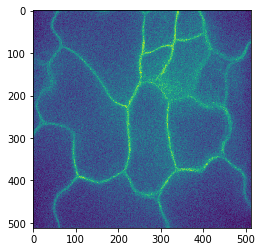

In [76]:
plt.imshow(img)

In [190]:
c = cv2.imread('./T01.tif', cv2.IMREAD_GRAYSCALE)
c.shape

(512, 512)

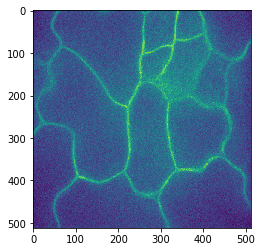

In [120]:
plt.imshow((c - c.mean()) / c.std())

(-0.5, 511.5, 511.5, -0.5)

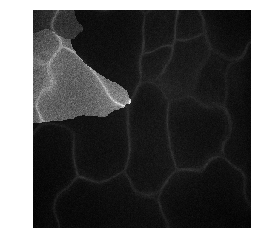

In [202]:
plt.imshow(np.where(niimg > 2, c, niimg*c+c/1.5), cmap='gray')
plt.axis('off')

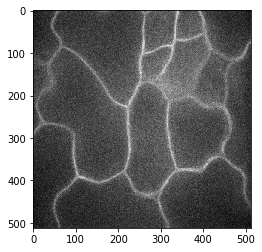

In [147]:
plt.imshow(c, cmap='gray')

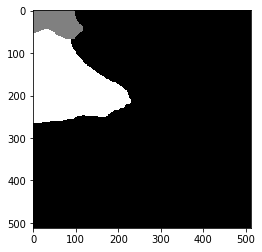

In [152]:
plt.imshow(niimg, cmap='gray')

In [119]:
def segmentation(table1, table2):

    nii_img = nib.load(table1)
    nii_img = np.asarray(nii_img.get_fdata())
    
    mask = cv2.imread(table2, cv2.IMREAD_GRAYSCALE)
    
    overlay = np.zeros_like(nii_img)
    
    for i in range(nii_img.shape[-1]):
        overlay[:,:,i] = np.where((nii_img[:,:,i] > 2) , mask, nii_img[:,:,i]*mask+mask/1.5)
   
    return overlay.swapaxes(-1,0)
test = segmentation('./two_cells.nii', './T01.tif')
# np.where(niimg > 2, c, niimg*c+c/1.5)

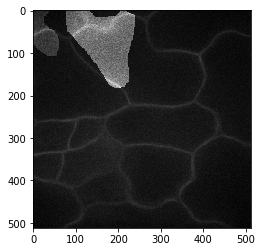

In [120]:
plt.imshow(test[16,:,:], cmap='gray')
# for i in range(nii6img.shape[-1]):
#     print(i)
# nii6img.shape

In [86]:
# nii6img[:,:,1].shape
test[18,:,:].min()

11.5

In [17]:
np.save('test.npy', test)

In [118]:
f = h5py.File('test_tom.h5', 'w')
f.create_dataset("tom", data=test)
f.close()

In [20]:
import h5py

In [31]:
test.shape

(28, 512, 512)